# S6: Condition number

In [3]:
import numpy as np

In [4]:
def hilbert(n):
    """ return a Hilbert matrix, H_ij = (i + j - 1)^{-1} """

    H = np.zeros((n,n), dtype=np.float64)

    for i in range(1, n+1):
        for j in range(1, n+1):
            H[i-1,j-1] = 1.0/(i + j - 1.0)
    return H

In [8]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
A = hilbert(13)
b = A @ x

print(b)

[13.         10.74843767  9.36354201  8.35781302  7.57512324  6.94112628
  6.41356206  5.9658224   5.5799875   5.24339503  4.94676743  4.68311084
  4.44703001]


In [11]:
from scipy.linalg import solve

x = solve(A, b)
print(x)

[  0.99999827   2.00026701   2.98981852   4.16835864   3.49478364
  14.14204054 -21.35707649  73.68873851 -93.2456266  115.66954968
 -58.52703395  38.3580321    8.61814859]


C:\Users\User\AppData\Local\Temp\ipykernel_16268\146767519.py:3: LinAlgWarning: Ill-conditioned matrix (rcond=1.28868e-18): result may not be accurate.
  x = solve(A, b)


# S7: Noisy signal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)

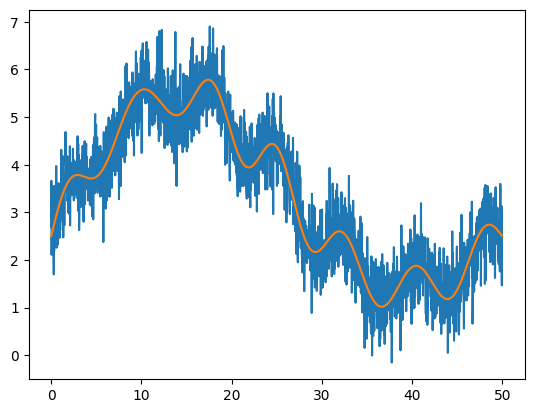

In [3]:
plt.plot(x, noisy)
plt.plot(x, orig)

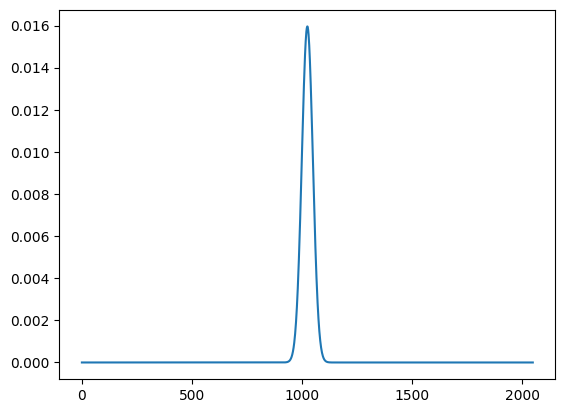

In [48]:
from scipy import signal

gaussian = signal.windows.gaussian(2048, 25)
gaussian = gaussian / np.sum(gaussian)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(gaussian)

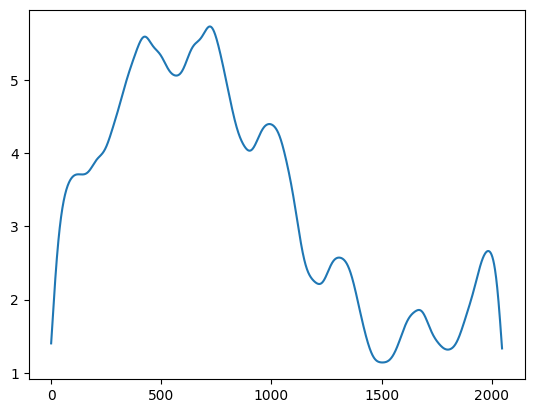

In [49]:
filtered = signal.convolve(noisy, gaussian, mode='same')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(filtered)